### Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

 - Has the network latency gone up since we switched internet service providers?

- $H_{0}$ = Network latency has no effect on switching internet service providers
- $H_{a}$ = Network latency has gone up since switching internet service providers
- true_pos = alpha > p value, we establish that internet service does impact latency
- true_neg = alpha < p, we establish that internet service has no impact on latency
- type1_error = we reject that internet service has no impact on latency but the truth is there is no impact
- type2_error = we don't reject that internet service has no impact on latency but there is significant impact why?

- Is the website redesign any good?

- $H_{0}$ = The webside design has no impact on total revenue
- $H_{a}$ = The website design has a correlation on total revenue
- true_pos = alpha > p value, we establish website design does affect total revenue
- true_neg = alpha < p, we establish that website design has no impact on revenue
- type1_error = we reject that website design has no impact on revenue but the truth is there is no impact
- type2_error = we don't reject that website design has no impact on revenue but there is significant impact, why?

- Is our television ad driving more sales?

- $H_{0}$ = Our television ad is not driving sales
- $H_{a}$ = Our television ad is driving more sales
- true_pos = reject null, the ad is driving more sales
- true_neg = accept null, and there is no significance of our ad on sales
- type1_error = we reject null, and say there is a significance of ad on sales and there is actually no significance
- type2_error = we accept that television ad is not driving sales, but actually there is significant impact.

Using the Zillow database:    

- Does square feet affect home value?

- $H_{0}$ = calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt
- $H_{a}$ = calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt
- true_pos = reject $H_{0}$, calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt
- true_neg = accept $H_{0}$, calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt
- type1error = we reject $H_{0}$, we say calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt, and the reality is calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt
- type2error = we accept calculatedfinishedsquarefeet has no impact on taxvaluedollarcnt, but actually calculatedfinishedsquarefeet has a significant impact on taxvaluedollarcnt

- Do newer homes generally have a larger square footage?

- $H_{0}$ = yearbuit has no impact on taxvaluedollarcnt
- $H_{a}$ = yearbuilt has a significant impact on taxvaluedollarcnt
- true_pos = we reject $H_{0}$, yearbuilt has a significant impact on taxvaluedollarcnt
- true_neg = we accept $H_{0}$, yearbuilt has no effect on taxvaluedollarcnt
- type1_error = we reject $H_{0}$, we say yearbuilt has a significant impact on taxvaluedollarcnt, but in reality it doesn't
- type2_error = we don't reject $H_{0}$, we say yearbuit has no impact on taxvaluedollarcnt, but actually it does.

In [2]:
from math import sqrt
from scipy import stats
from pydataset import data


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import viz
import datetime
import seaborn as sns

### Hypothesis Testing Exercises

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [3]:
# Two different samples, two tailed test
alpha = 0.05

In [4]:
mean1=90
std_dev1=15
nobs1=40
var1=15**(1/2)

mean2=100
std_dev2=20
nobs2=50
var2=20**(1/2)


t, p = stats.ttest_ind_from_stats(mean1, std_dev1, nobs1,
                                 mean2, std_dev2, nobs2, equal_var=False)
t, p, alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [5]:
p < alpha

True

In [6]:
if p < alpha: 
    print("Reject the null hypothesis, they are the same")
    print("We move forward with the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

Reject the null hypothesis, they are the same
We move forward with the alternative hypothesis


### Load the mpg dataset and use it to answer the following questions:

In [7]:
mpg = data("mpg")
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
106,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
27,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
36,chevrolet,malibu,3.5,2008,6,auto(l4),f,18,29,r,midsize


In [8]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
mpg['average_mileage'] = (mpg.hwy + mpg.cty) / 2
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
71,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup,13.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
161,subaru,forester awd,2.5,1999,4,auto(l4),4,18,24,r,suv,21.0
84,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup,15.5


In [9]:
# set up my variables
fuel99 = mpg[mpg.year==1999].average_mileage
fuel08 = mpg[mpg.year==2008].average_mileage

<AxesSubplot:>

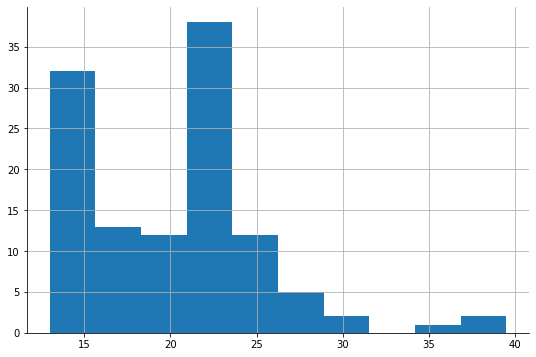

In [10]:
fuel99.hist()

<AxesSubplot:>

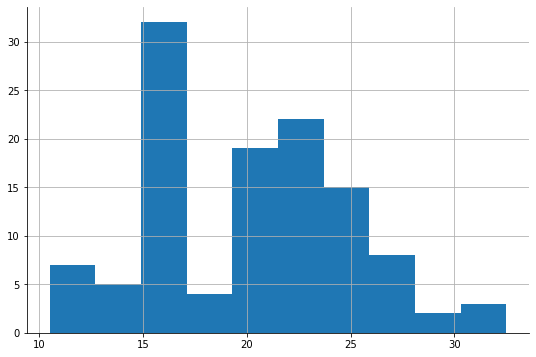

In [11]:
fuel08.hist()

#### set hypothesis
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?\

$H_{0}$: There is no difference in fuel-efficiency in cars from 2008 and 1999.\
$H_{a}$: There is a difference in fuel-efficiency in cars from 2008 and 1999.

In [12]:
fuel99.var(), fuel08.var()

(27.122605363984682, 24.097480106100797)

In [13]:
t, p = stats.ttest_ind(fuel08, fuel99, equal_var=True)

t, p, alpha

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [14]:
if p < alpha: 
    print("Reject the null hypothesis, they are the same")
    print("We move forward with the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### - Are compact cars more fuel-efficient than the average car?

In [15]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0
172,subaru,impreza awd,2.5,2008,4,manual(m5),4,19,25,p,compact,22.0
14,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact,21.0
183,toyota,camry,2.4,2008,4,auto(l5),f,21,31,r,midsize,26.0
67,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,13,17,r,pickup,15.0


In [16]:
# set up my variables
compact = mpg[mpg['class'] == 'compact'].average_mileage
all_cars = mpg.average_mileage

<AxesSubplot:>

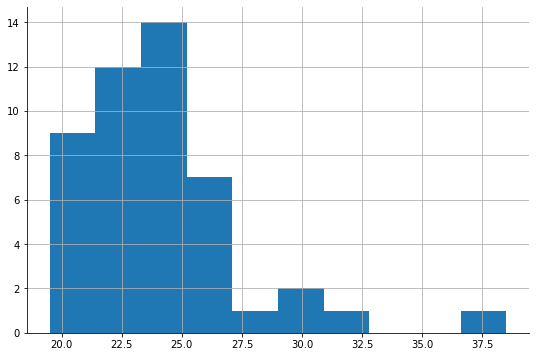

In [17]:
compact.hist()

<AxesSubplot:>

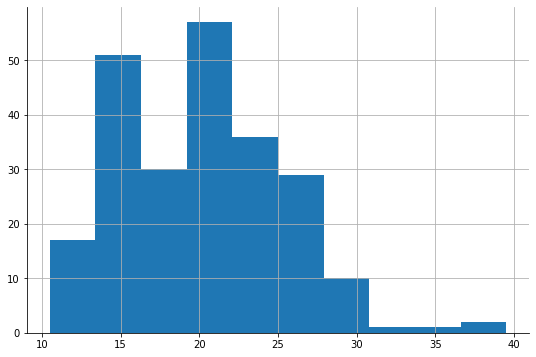

In [18]:
all_cars.hist()

In [19]:
compact.count(), all_cars.count()

(47, 234)

In [20]:
compact.var(), all_cars.var()

(12.442876965772433, 25.50542900113715)

$H_{0}$: Compact cars are not more fuel efficient than the average\
$H_{a}$: Compact cars are more fuel-efficient than the average car

In [21]:
# one sample ttest, 1-tail test
alpha = 0.05
compact = mpg[mpg['class'] == 'compact'].average_mileage
overall_mean = mpg.average_mileage.mean()

t, p = stats.ttest_1samp(compact, overall_mean)
t, p/2, alpha

(7.896888573132535, 2.0992818971585668e-10, 0.05)

In [22]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Do manual cars get better gas mileage than automatic cars?

In [23]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
61,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv,15.0
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,30.0
192,toyota,camry solara,3.0,1999,6,manual(m5),f,18,26,r,compact,22.0
226,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,24.0
130,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5


In [24]:
manual = mpg[mpg['trans'].str.startswith('m')].average_mileage
automatic = mpg[mpg['trans'].str.startswith('a')].average_mileage

<AxesSubplot:>

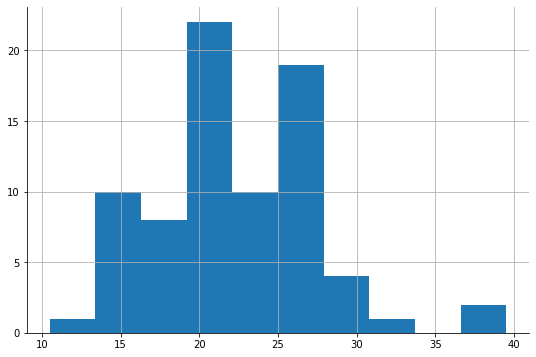

In [25]:
manual.hist()

<AxesSubplot:>

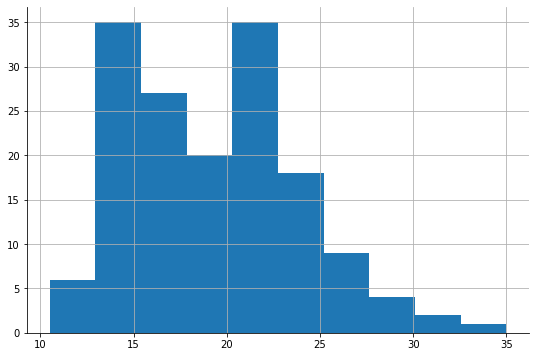

In [26]:
automatic.hist()

In [27]:
manual.count(), automatic.count()

(77, 157)

In [28]:
manual.var(), automatic.var()

(26.635167464114826, 21.942777233382337)

In [29]:
stats.levene(manual, automatic)
# if p < .05 then equal_var=False
# if p > 0.05 then equal_var=True

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [30]:
alpha = 0.05

t, p = stats.ttest_ind(manual, automatic, equal_var=False)

t, p/2, alpha

(4.443514012903071, 8.976124499958965e-06, 0.05)

In [31]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [32]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [33]:
t, p = stats.ttest_ind(automatic, manual, equal_var=True)

t, p/2, alpha

(-4.593437735750014, 3.5771872005728416e-06, 0.05)

### Correlation Exercises

In [34]:
telco = pd.read_csv('Cust_Churn_Telco.csv')
telco = telco.dropna()
telco.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5302,9700-ISPUP,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,65.50,616.90,No
5540,3803-KMQFW,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.55,20.55,Yes
5246,1981-INRFU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.75,164.50,Yes
2969,1163-VIPRI,Female,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.30,7337.55,No
928,0862-PRCBS,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),103.75,7039.45,No


#### Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [35]:
x = telco.tenure
y = telco.MonthlyCharges

(0.0, 80.0)

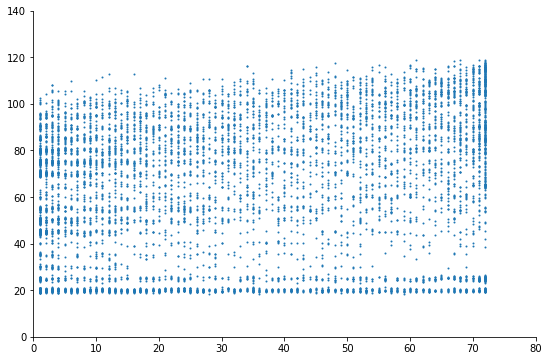

In [36]:
plt.scatter(x, y, s=1)
plt.ylim(0,140) 
plt.xlim(0,80)

In [37]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.2468617666408957, 3.9898213232510553e-98, 0.05)

In [38]:
p < alpha

True

Thus we reject $H_{0}$, there is a correlation between tenure and monthly charges.

#### Does tenure correlate with total charges? 

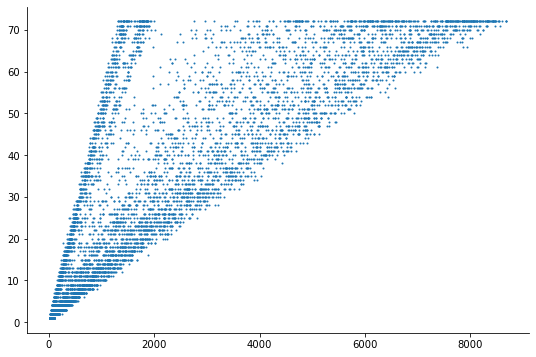

In [39]:
x = telco.TotalCharges
y = telco.tenure
plt.scatter(x, y, s=1)

In [40]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.8258804609332093, 0.0, 0.05)

In [41]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


#### What happens if you control for phone and internet service?

(0.0, 150.0)

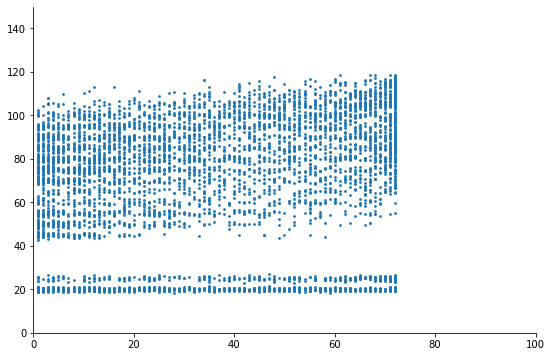

In [42]:
# for customers with phone service
x = telco[telco.PhoneService=='Yes'].tenure
y = telco[telco.PhoneService=='Yes'].MonthlyCharges

plt.scatter(x, y, s=3)
plt.xlim(0,100)
plt.ylim(0,150)

In [43]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.24419396575193372, 6.828016037598485e-87, 0.05)

In [44]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


(0.0, 100.0)

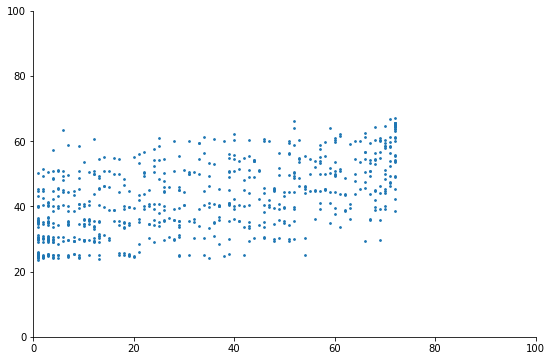

In [45]:
# for customers without phone service
x = telco[telco.PhoneService=='No'].tenure
y = telco[telco.PhoneService=='No'].MonthlyCharges

plt.scatter(x, y, s=3)
plt.xlim(0,100)
plt.ylim(0,100)

In [46]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.5924298640568981, 1.1732739032893169e-65, 0.05)

In [47]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


(0.0, 150.0)

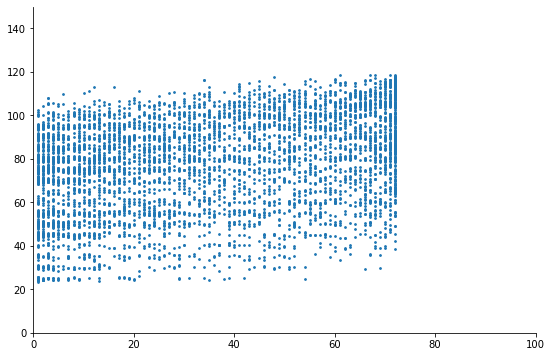

In [48]:
# for customers with internet service
x = telco[telco.InternetService!='No'].tenure
y = telco[telco.InternetService!='No'].MonthlyCharges

plt.scatter(x, y, s=3)
plt.xlim(0,100)
plt.ylim(0,150)

In [49]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.37203919761332516, 1.6186841401674893e-180, 0.05)

In [50]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


(0.0, 60.0)

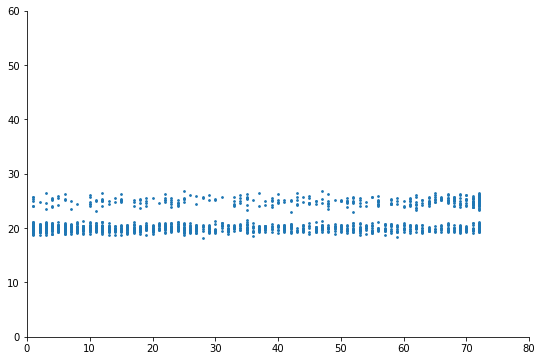

In [51]:
# for customers with internet service
x = telco[telco.InternetService=='No'].tenure
y = telco[telco.InternetService=='No'].MonthlyCharges

plt.scatter(x, y, s=3)
plt.xlim(0,80)
plt.ylim(0,60)

In [52]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.34618773548574805, 4.896604599947503e-44, 0.05)

In [53]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


### Use the employees database.


In [54]:
def get_db_url(host, user, password, database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url


from env import host, user, password
url = get_db_url(host, user, password, 'employees')

employees = pd.read_sql('SELECT * FROM employees', url)
employees.sample(10)

,emp_no,birth_date,first_name,last_name,gender,hire_date
117972,217948,1963-11-05,Kwok,Gruenwald,M,1988-11-19
249100,449076,1952-11-27,Toshimi,Shanbhogue,M,1996-04-03
145732,245708,1961-09-01,JiYoung,Thambidurai,M,1988-03-22
78861,88862,1956-12-03,Yechezkel,Cannata,M,1995-02-03
89518,99519,1954-02-21,Jackson,Nourani,F,1989-04-22
13336,23337,1955-01-26,Sachar,Brizzi,M,1989-01-08
39660,49661,1958-04-03,Augustine,Hertweck,F,1987-10-01
107783,207759,1953-11-04,Hugo,Chaudhury,F,1989-03-17
176132,276108,1962-11-07,Mack,Chorvat,F,1990-01-09
86832,96833,1958-11-11,Ugo,Birke,M,1988-07-27


#### Is there a relationship between how long an employee has been with the company and their salary?

In [55]:
salaries = pd.read_sql('SELECT * FROM salaries', url)
salaries.sample(5)

,emp_no,salary,from_date,to_date
2465635,459923,81752,1994-03-08,1995-03-08
2304819,443042,73456,1996-12-06,1997-12-06
1391782,246571,60897,1989-08-24,1990-08-24
538814,66731,58738,1999-01-09,2000-01-09
487282,61297,71883,1993-08-30,1994-08-30


In [56]:
hire_date = pd.read_sql('SELECT DISTINCT(emp_no), hire_date FROM employees', url)
hire_date.head()

,emp_no,hire_date
0,10001,1986-06-26
1,10002,1985-11-21
2,10003,1986-08-28
3,10004,1986-12-01
4,10005,1989-09-12


In [57]:
curr_employees = pd.read_sql('SELECT * FROM salaries WHERE to_date > now()', url)
curr_employees.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [58]:
# this table has current salaries and distinct emp_no
es = (hire_date.merge(curr_employees,  
                    how='inner')
                    )
es.sample(5)

,emp_no,hire_date,salary,from_date,to_date
131919,264609,1989-03-21,91866,2001-12-09,9999-01-01
49605,71833,1996-07-11,62562,2002-07-10,9999-01-01
187344,434002,1986-05-22,66620,2002-05-18,9999-01-01
168887,410892,1986-12-16,77858,2001-12-12,9999-01-01
5107,16333,1995-10-19,118639,2001-10-17,9999-01-01


In [59]:
es['tenure'] = datetime.date(2021, 5, 11) - es.hire_date
es.tenure.astype(int)
es.head()

,emp_no,hire_date,salary,from_date,to_date,tenure
0,10001,1986-06-26,88958,2002-06-22,9999-01-01,12738 days
1,10002,1985-11-21,72527,2001-08-02,9999-01-01,12955 days
2,10003,1986-08-28,43311,2001-12-01,9999-01-01,12675 days
3,10004,1986-12-01,74057,2001-11-27,9999-01-01,12580 days
4,10005,1989-09-12,94692,2001-09-09,9999-01-01,11564 days


In [60]:
es['tenure'] = es.tenure.astype(str)

In [61]:
es['tenure'] = es.tenure.str.strip('days').astype(int)

In [62]:
es.head()

,emp_no,hire_date,salary,from_date,to_date,tenure
0,10001,1986-06-26,88958,2002-06-22,9999-01-01,12738
1,10002,1985-11-21,72527,2001-08-02,9999-01-01,12955
2,10003,1986-08-28,43311,2001-12-01,9999-01-01,12675
3,10004,1986-12-01,74057,2001-11-27,9999-01-01,12580
4,10005,1989-09-12,94692,2001-09-09,9999-01-01,11564


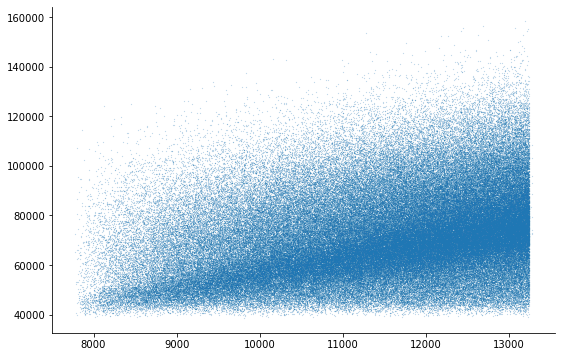

In [63]:
x = es.tenure
y = es.salary
plt.scatter(x, y, s=.01)
plt.xlim = 15000
plt.ylim = 200000

In [64]:
x = es.tenure
y = es.salary
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.30646256131860894, 0.0, 0.05)

In [65]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


#### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [66]:
s = data('sleepstudy')
s.sample(5)

,Reaction,Days,Subject
84,270.8021,3,335
145,314.8222,4,369
90,237.2466,9,335
99,455.8643,8,337
77,305.5248,6,334


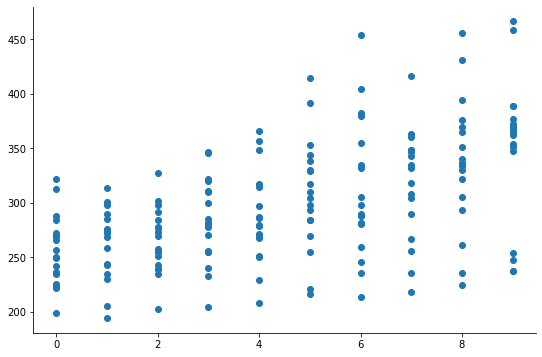

In [67]:
x = s.Days
y = s.Reaction
plt.scatter(x, y)

In [68]:
r, p = stats.pearsonr(x, y)
r, p, alpha

(0.5352302262650253, 9.894096322214812e-15, 0.05)

In [69]:
if (p < alpha):
    print("We reject the null hypothesis, there is a correlation")
else:
    print("We fail to reject the null hypothesis, there is no correlation")

We reject the null hypothesis, there is a correlation


In [79]:
df = pd.DataFrame({'CodeUp Student': [49, 1], 'Not a CodeUp student': [20,30]}, index=['Uses a Macbook', "Doesn't Use a Macbook"])

In [80]:
df

,CodeUp Student,Not a CodeUp student
Uses a Macbook,49,20
Doesn't Use a Macbook,1,30


In [81]:
# set our alpha
alpha = 0.01

In [82]:
chi2, p, degf, expected = stats.chi2_contingency(df)

In [85]:
print('Observed\n')
print(df.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.0000


In [87]:
null_hypothesis = "using a macbook and being a codeup student are independent of each other"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that using a macbook and being a codeup student are independent of each other


#### Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [103]:
mpg = data('mpg')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
163,subaru,forester awd,2.5,2008,4,manual(m5),4,19,25,p,suv
155,pontiac,grand prix,3.1,1999,6,auto(l4),f,18,26,r,midsize
94,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact
42,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
116,hyundai,tiburon,2.0,1999,4,auto(l4),f,19,26,r,subcompact


In [91]:
mpg.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
subaru        14
hyundai       14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [95]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [97]:
mpg.isnull().any()

manufacturer    False
model           False
displ           False
year            False
cyl             False
trans           False
drv             False
cty             False
hwy             False
fl              False
class           False
dtype: bool

$H_{0}$: Compact cars are independent from Dogdge vehicles\
$H_{a}$: Compacts cars are associated to Dodge vehicles

In [121]:
dodge = mpg[mpg.manufacturer=='dodge'].count()
compact = mpg[mpg['class'] == 'compact'].count()
# dodge_compact = mpg[np.where(mpg.manufacturer=='dodge' | mpg['class']=='compact')]
# other_vehicle


In [122]:
mpg.manufacturer.dodge

AttributeError: 'Series' object has no attribute 'dodge'

In [101]:
df = pd.DataFrame({'Dodge': [49, 1], 'Not Dodge': [20,30]}, index=['Compact', "Not Compact"])
df

,Dodge,Not Dodge
Compact,49,20
Not Compact,1,30


In [ ]:
## Next

In [113]:
mpg.drv.value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [126]:
observed = pd.crosstab(mpg.manufacturer, mpg.drv)

In [135]:
curr_employees = pd.read_sql(
"SELECT *FROM employees JOIN dept_emp USING(emp_no) JOIN departments USING(dept_no) WHERE to_date > now() AND dept_name LIKE 'sales' OR dept_name LIKE 'marketing'", url)
curr_employees.sample(5)

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
10347,d001,255395,1954-09-27,Toshimitsu,Rijsenbrij,M,1992-06-19,1992-07-11,1993-03-15,Marketing
38442,d007,245708,1961-09-01,JiYoung,Thambidurai,M,1988-03-22,1988-03-22,9999-01-01,Sales
25928,d007,54900,1964-02-22,Khalil,Stemann,M,1986-07-03,1986-07-03,9999-01-01,Sales
16688,d001,449965,1953-07-20,Gaetan,Gilg,F,1986-03-05,1986-03-05,9999-01-01,Marketing
41146,d007,266868,1960-01-19,Mingdong,Zuberek,F,1985-02-27,1996-11-21,9999-01-01,Sales


In [139]:
managers = pd.read_sql("SELECT * FROM employees JOIN titles USING(emp_no) WHERE title LIKE 'manager'", url)
managers.sample(5)

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
4,110183,1953-06-24,Shirish,Ossenbruggen,F,1985-01-01,Manager,1985-01-01,1992-03-21
8,110386,1953-10-04,Shem,Kieras,M,1988-10-14,Manager,1992-08-02,1996-08-30
13,110765,1954-05-22,Rutger,Hofmeyr,F,1989-01-07,Manager,1989-05-06,1991-09-12
1,110039,1963-06-21,Vishwani,Minakawa,M,1986-04-12,Manager,1991-10-01,9999-01-01
21,111784,1956-06-14,Marjo,Giarratana,F,1988-02-12,Manager,1988-10-17,1992-09-08
